## **Convolutional Neural Networks**

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

And TensorFlow ≥ 2.8:

In [ ]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

It can be very slow without a GPU, so let's make sure there's one, or else issue a warning:

In [ ]:
# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Convolutional Layers
## Implementing Convolutional Layers With Keras

Let's load two sample images, rescale their pixel values to 0-1, and center crop them to small 70×120 images:

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]


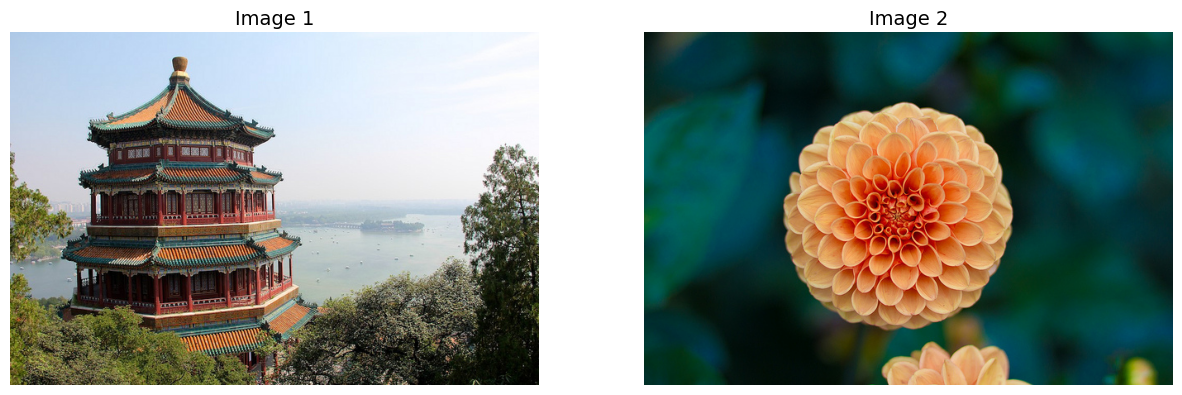

In [ ]:
import matplotlib.pyplot as plt

# Display the images
fig, axs = plt.subplots(1, len(images), figsize=(15, 5))

# Loop through each image and display it
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Image {i+1}")

plt.show()


In [ ]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)



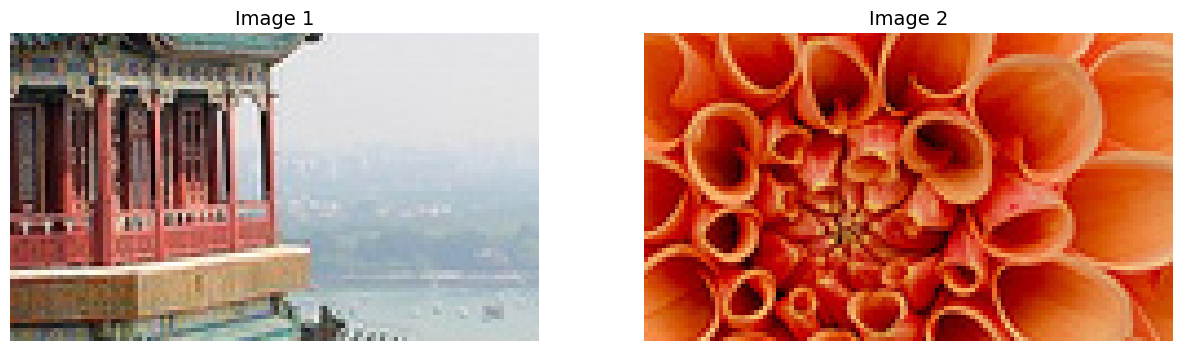

In [ ]:
import matplotlib.pyplot as plt

# Display the images
fig, axs = plt.subplots(1, len(images), figsize=(15, 5))

# Loop through each image and display it
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Image {i+1}")

plt.show()

In [ ]:
images

<tf.Tensor: shape=(2, 70, 120, 3), dtype=float32, numpy=
array([[[[0.30588236, 0.4039216 , 0.3921569 ],
         [0.0509804 , 0.14509805, 0.16078432],
         [0.21568629, 0.3372549 , 0.31764707],
         ...,
         [0.9058824 , 0.90196085, 0.9215687 ],
         [0.9058824 , 0.90196085, 0.9215687 ],
         [0.9058824 , 0.90196085, 0.9215687 ]],

        [[0.4901961 , 0.54901963, 0.5686275 ],
         [0.22352943, 0.27450982, 0.30980393],
         [0.16862746, 0.25490198, 0.24705884],
         ...,
         [0.90196085, 0.8980393 , 0.9176471 ],
         [0.90196085, 0.8980393 , 0.9176471 ],
         [0.9058824 , 0.9058824 , 0.91372555]],

        [[0.48627454, 0.4039216 , 0.46274513],
         [0.42352945, 0.4039216 , 0.41960788],
         [0.10588236, 0.12156864, 0.13333334],
         ...,
         [0.8980393 , 0.8980393 , 0.9058824 ],
         [0.90196085, 0.90196085, 0.909804  ],
         [0.90196085, 0.90196085, 0.909804  ]],

        ...,

        [[0.33333334, 0.2901961 , 0

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:

conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

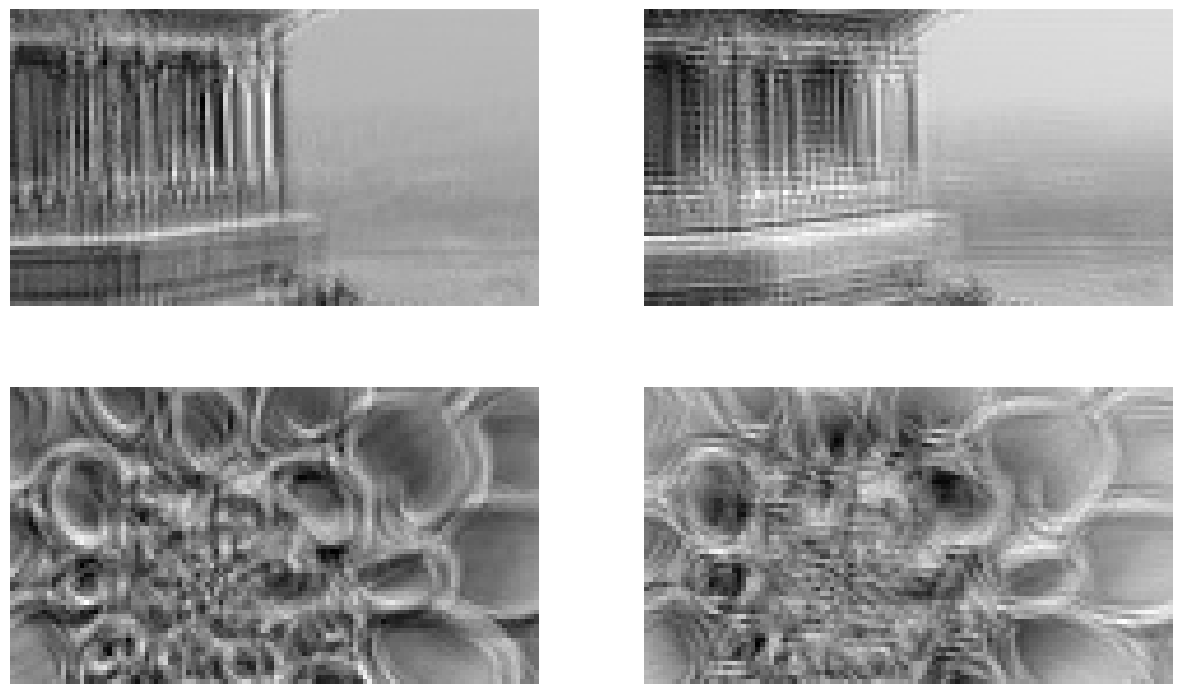

In [ ]:


plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

As you can see, randomly generated filters typically act like edge detectors, which is great since that's a useful tool in image processing, and that's the type of filters that a convolutional layer typically starts with. Then, during training, it gradually learns improved filters to recognize useful patterns for the task.

Now let's use zero-padding:

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding="same")
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

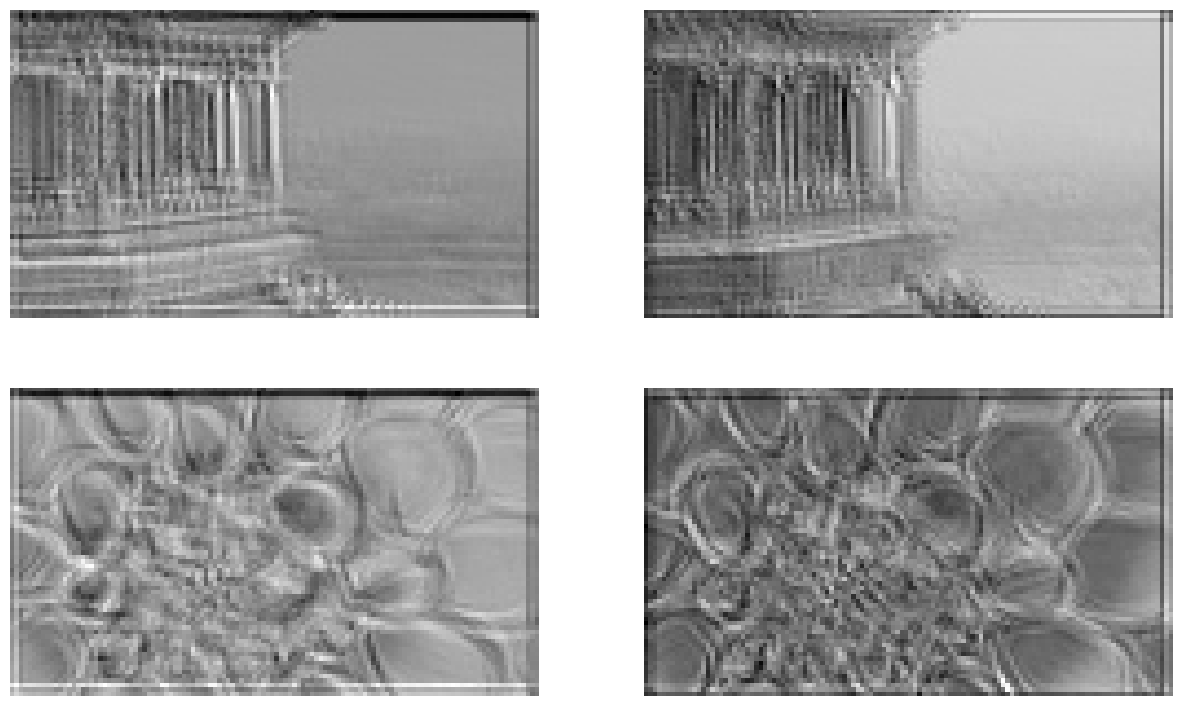

In [ ]:
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In [ ]:
#  shows that the output shape when we set strides=2
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same",
                                    strides=2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

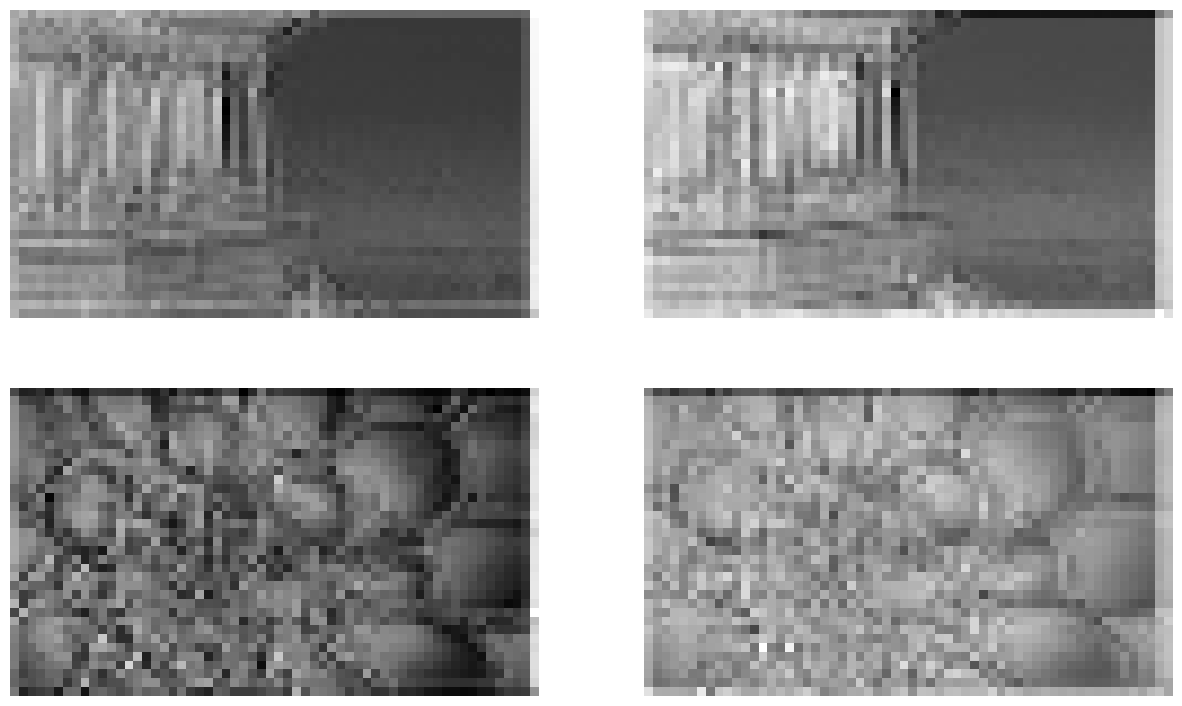

In [ ]:
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

Let's now look at the weights:

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
biases.shape

(32,)

# Pooling Layers
## Implementing Pooling Layers With Keras

**Max pooling**

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = max_pool(images)

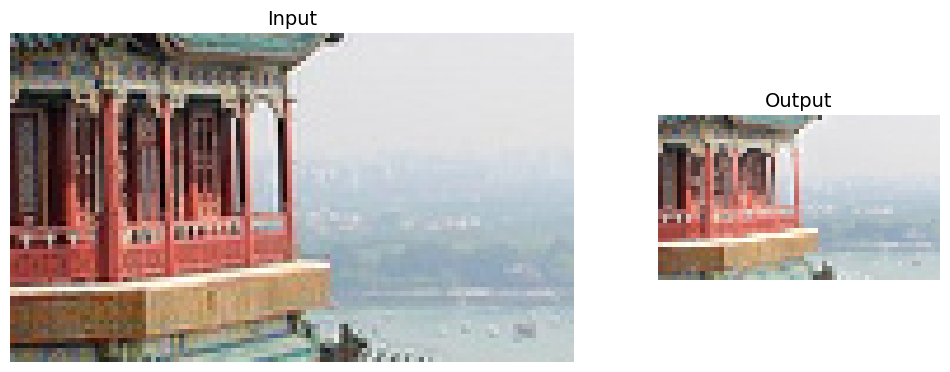

In [ ]:
#  shows what max pooling with stride = 2 looks like

import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

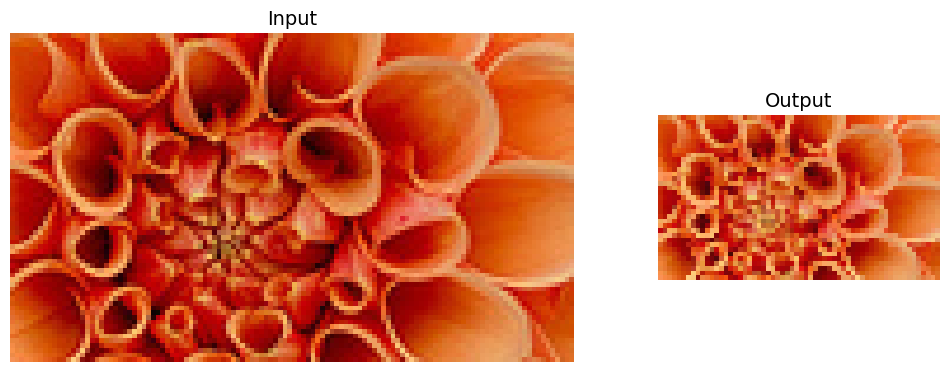

In [ ]:
import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[1])  # plot the 2nd image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[1])  # plot the output for the 2nd image
ax2.axis("off")
plt.show()

In [ ]:
output[1].shape

TensorShape([35, 60, 3])

In [ ]:
images[1].shape

TensorShape([70, 120, 3])

# CNN Architectures

**Tackling Fashion MNIST With a CNN**

In [ ]:
import numpy as np
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from functools import partial


DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         2

Trainable params=(kernel size×input channels+1)×number of filters

In [ ]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]  # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 29s 11ms/step - loss: 0.7947 - accuracy: 0.7212 - val_loss: 0.4045 - val_accuracy: 0.8610
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4545 - accuracy: 0.8451 - val_loss: 0.3066 - val_accuracy: 0.8848
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3749 - accuracy: 0.8731 - val_loss: 0.2907 - val_accuracy: 0.8920
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3311 - accuracy: 0.8883 - val_loss: 0.2661 - val_accuracy: 0.9022
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3058 - accuracy: 0.8975 - val_loss: 0.2565 - val_accuracy: 0.9084
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2888 - accuracy: 0.9034 - val_loss: 0.2794 - val_accuracy: 0.9046
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2607 - accuracy: 0.9114 - val_loss: 0.2635 - val_a